## Dataset Description

The AB Testing dataset provided here is a synthetic dataset created using the Random Sampling technique provided by the Numpy Package. This dataset emulates information regarding visits made by users on imaginary retail websites across the UK. So, in this scenario, let the color 'White' be assigned to Group A which is the default setting for the background color on the website, representing the control group. Also, let the color 'Black' be equivalent to Group B which is the newer setting to test.

Below are all the features in the dataset:

1. **User ID**: Serves as an identifier for each user.

2. **Group**: Contains both the control group (A) and treatment group (B).
3. **Page Views**: Number of pages the user viewed during their session.
4. **Time Spent**: The total amount of time, in seconds, that the user spent on the site during the session.
5. **Conversion**: Indicates whether a user has completed a desired action (Yes/No).
6. **Device**: Type of device used to access the website.
7. **Location**: The country in UK where the user is based in.

## Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro, levene, ttest_ind, mannwhitneyu
from scipy import stats

## Reading The Data

In [41]:
df = pd.read_csv("ab_testing.csv")
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [43]:
# Check missing values
df.isnull().sum()

User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64

In [44]:
# Check duplicates
if df.duplicated().sum() > 0 :
    print("There is duplication")
else:
    print("No Duplication")

No Duplication


## A/B testing on Discrete metrics: Conversion

### Conversion Rate

In [45]:
df.groupby('Group')['Conversion'].value_counts(normalize=True).unstack()

Conversion,No,Yes
Group,,
A,0.946010,0.053990
B,0.859331,0.140669


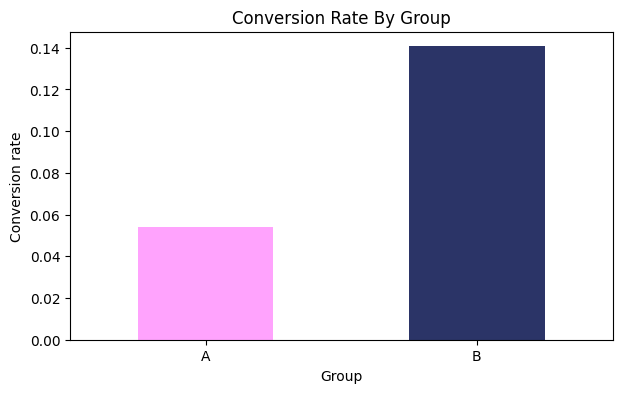

In [46]:
con_p = df.groupby('Group')['Conversion'].apply(lambda x: (x == 'Yes').mean())
con_p.plot(kind ='bar', ylabel = 'Conversion rate', color = ["#FFA3FD", "#2B3467"], figsize = (7,4))

plt.title("Conversion Rate By Group")
plt.xticks(rotation = 0)
plt.show()

- The Conversion number is a discrete metric, the sample size of the data is large, so **Pearson's Chi-Square Test** is much better to be applied.
- The conversion rate for group B was higher (14.06%) than that of group A (5.39%). This suggests that **group B had a positive impact on conversions**, or we can say that users who use a black background color are more likely to complete the desired action. 

### Chi-Square Test

The Chi-Square test is used to test if there is a dependency or association between two categorical variables.

We will test whether there is a correlation between the background color (Group) and completing the desired action (Conversion).

Hypothesis:
- **H0** : M1 = M2 => There is no statistically significant difference between group A and group B
- **H1** : M1 ≠ M2 => There is a statistically significant difference between group A and group B

In [47]:
ct = pd.crosstab(df['Group'], df['Conversion'])
chi2, p_value, dof, expected = chi2_contingency(ct)

In [48]:
print(f"Chi-Square statistic = {chi2},  P-value = {p_value}")

if p_value < 0.05 :
    print("Reject H0.")
else:
    print("Fail to Reject H0.")

Chi-Square statistic = 106.22812337440538,  P-value = 6.571736018334222e-25
Reject H0.


Using a 5% significance level, we will reject H0 and choose H1: There is a statistically significant difference between group A and group B. This means that there is a relationship between the background color and the user completing the desired action.

Because we tested it using Chi-Square Test, the results do not give or show how much impact the background color has on user actions.


## A/B Testing on Continous metric: Page Views, Time Spent

Steps:
1. Establish the Hypothesis
    - **H0** : M1 = M2  => There is no statistically significant difference between groups A and B.
    - **H1** : M1 ≠ M2  => There is statistically significant difference between groups A and B.
2. Assumption Check

    2.1 Normality Assumption (Shapiro-Wilk Test)
    - **H0** : The distribution is normal.
    - **H1** : The distribution is not normal.

    2.2 Variance Homogeneity (Levene Test) *
    - **H0** : Variances are homogeneous.
    - **H1** : Variances are not homogeneous.
3. Implementation of the Hypothesis
    - If **normal** & **homogeneity**, apply **T-test** (parametric test)
    - If **normal** but **non-homogeneity**, apply **Welch Test**
    - If **non-normal**, apply **Mann Whitney U Test** (non-parametric test)
4. Interpret Results

*only tested if the distribution is normal

### **Page Views**

In [49]:
# Normality Assumption
test_stat, pvalue = shapiro(df.loc[df['Group'] == 'A', 'Page Views'])

In [50]:
print(f"Test Stat = {test_stat},  P-Value = {pvalue}")

if pvalue < 0.05 :
    print("Reject H0. Distribution is not normal.")
else:
    print("Fail to Reject H0. Distribution is normal")

Test Stat = 0.9418079853057861,  P-Value = 2.1348030653871078e-30
Reject H0. Distribution is not normal.


Since the distribution is not normal, then 
- there is no need to test the homogeneity of variance
- we will directly perform non-parametric testing using the Mann Whitney U Test to compare the two groups.

In [51]:
# Mann Whitney U Test
test_stat, pvalue = mannwhitneyu(df.loc[df['Group'] == 'A', 'Page Views'], 
                                 df.loc[df['Group'] == 'B', 'Page Views'])

In [52]:
print(f"Test Stat = {test_stat},  P-Value = {pvalue}")

if pvalue < 0.05 :
    print("Reject H0.")
else:
    print("Fail to Reject H0.")

Test Stat = 3165458.0,  P-Value = 0.42467839841511335
Fail to Reject H0.


Using a 5% significance level, we fail  to reject H0: There is no statistically significant difference between groups A and B. This means that there is no significant effect between the background color and the number of pages viewed by users.

### **Time Spent**

In [53]:
# Normality Assumption
test_stat, pvalue = shapiro(df.loc[df['Group'] == 'A', 'Time Spent'])

In [54]:
print(f"Test Stat = {test_stat},  P-Value = {pvalue}")

if pvalue < 0.05 :
    print("Reject H0. Distribution is not normal.")
else:
    print("Fail to Reject H0. Distribution is normal")

Test Stat = 0.9548661708831787,  P-Value = 3.081412607158752e-27
Reject H0. Distribution is not normal.


In [55]:
# Mann Whitney U Test
test_stat, pvalue = mannwhitneyu(df.loc[df['Group'] == 'A', 'Time Spent'], 
                                 df.loc[df['Group'] == 'B', 'Time Spent'])

In [56]:
print(f"Test Stat = {test_stat},  P-Value = {pvalue}")

if pvalue < 0.05 :
    print("Reject H0.")
else:
    print("Fail to Reject H0.")

Test Stat = 3101095.0,  P-Value = 0.6420301034033706
Fail to Reject H0.


Using a 5% significance level, we fail to reject H0: There is no statistically significant difference between groups A and B. This means that there is no significant effect between the background color and total amount of time spent by users.